In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


cultural = pd.read_csv("actividades-culturales-2021.csv", sep=';')
nombres = pd.read_csv("nombres-2010-2014.csv")
cultural = cultural.dropna()
nombres = nombres.dropna()

In [58]:
#Parte 1
#Punto 1

cont_vir  = 0
cont_pre = 0

def ver_mod(valor):
  global cont_vir
  global cont_pre
  valor = str(valor)  
  if valor == "Virtual":
    cont_vir =  cont_vir + 1
  else:
    cont_pre = cont_pre + 1
  return valor


cultural['Modalidad']= cultural['Modalidad'].apply(ver_mod)

print(cont_vir)
print(cont_pre)

708
2212


In [59]:
#Punto 2

cont_suspende_si  = 0
cont_suspende_no = 0


def se_suspende(valor):
  global cont_suspende_si
  global cont_suspende_no
  valor = str(valor)  
  if valor == "Si":
    cont_suspende_si += 1
  elif valor == "No":
    cont_suspende_no += 1
  return valor

cultural['se_suspende_por_lluvia']= cultural['se_suspende_por_lluvia'].apply(se_suspende)

print(cont_suspende_si)
print(cont_suspende_no)

131
2369


In [91]:
#Punto 3

cont_mes = 0

for a,b in zip(cultural.fecha_inicio, cultural.fecha_fin):
    x = re.findall("\d+", str(a) )  
    y = re.findall("\d+", str(b) )  
    if int(x[1]) <= 5 and int(y[1]) >= 5:
        cont_mes += 1
    
print(cont_mes)
        

10


In [92]:
#Punto 4

cont_mes_sep = 0

for a, b, c in zip(cultural.fecha_inicio, cultural.fecha_fin, cultural.se_suspende_por_lluvia):
    x = re.findall("\d+", str(a) )  
    y = re.findall("\d+", str(b) )  
    if int(x[1]) <= 9 and int(y[1]) >= 9 and c == "Si":
        cont_mes_sep += 1
    
print(cont_mes_sep)

0


In [97]:
#Punto 5

cont_cine = []

for a in cultural.actividad:
    x = re.findall(r'\bCine\b', a)
    y = re.findall(r'\bcine\b', a)  
    if x or y:
        cont_cine.append(a)
    
print(cont_cine)

['Cine al aire libre', 'Cine al aire libre', 'Cine al aire libre', 'Cine al aire libre', 'Cine al aire libre', 'Cine al aire libre', 'MiniMuseos - Taller "MI afiche de película" - Museo del Cine', 'Artistas a cielo abierto - Temática Cine:  Taller para crear una obra de arte en movimiento inspirada en el cine', 'MiniMuseos - Taller "MI afiche de película" - Museo del Cine', 'MiniMuseos - Taller "MI afiche de película" - Museo del Cine', 'Artistas a cielo abierto - Temática Cine: Taller para crear una obra de arte en movimiento inspirada en el cine.', 'Cine y patrimonio en el Abasto']


In [95]:
#Punto 6

cont_3 = 0

for a, b in zip(cultural.fecha_inicio, cultural.fecha_fin):
    x = re.findall("\d+", str(a) )  
    y = re.findall("\d+", str(b) )
    dias = int(y[2]) - int(x[2])
    if dias > 3:
        cont_3 += 1
    
print(cont_3)

39


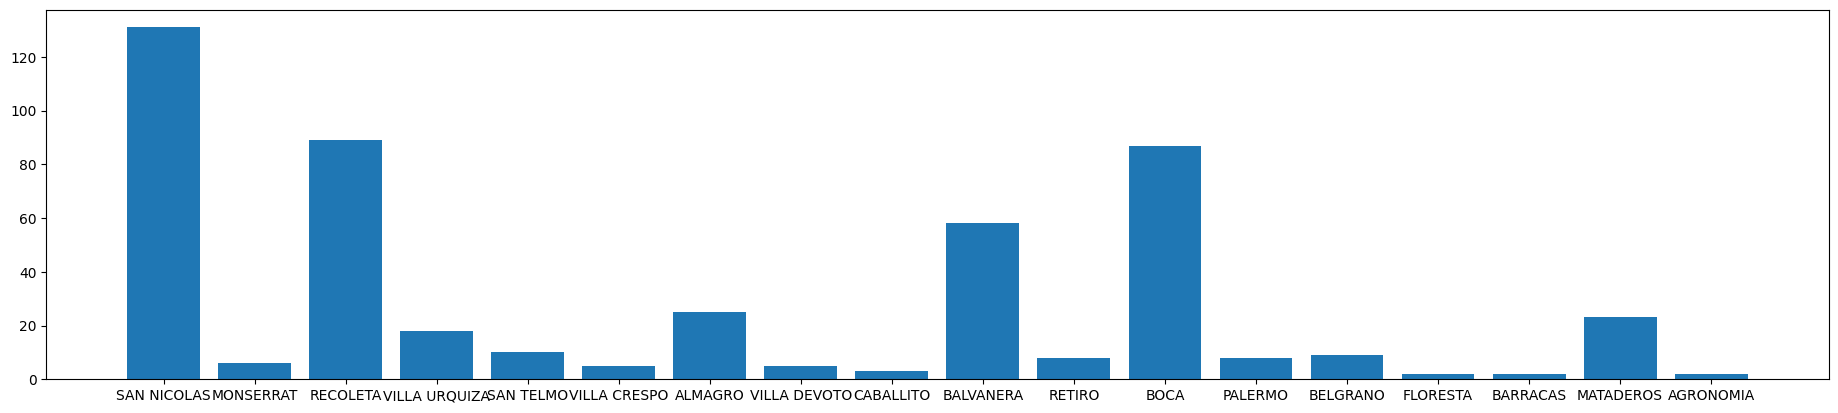

{'SAN NICOLAS': 131, 'MONSERRAT': 6, 'RECOLETA': 89, 'VILLA URQUIZA': 18, 'SAN TELMO': 10, 'VILLA CRESPO': 5, 'ALMAGRO': 25, 'VILLA DEVOTO': 5, 'CABALLITO': 3, 'BALVANERA': 58, 'RETIRO': 8, 'BOCA': 87, 'PALERMO': 8, 'BELGRANO': 9, 'FLORESTA': 2, 'BARRACAS': 2, 'MATADEROS': 23, 'AGRONOMIA': 2}


In [49]:
#Punto 7

barrios_total = cultural["barrio"].tolist()

barrios_dict = {}

for i in barrios_total:
    barrios_dict[i] = 1

for i in barrios_total:
    barrios_dict[i] += 1


f = plt.figure()
f.set_figwidth(23)

plt.bar(list(barrios_dict.keys()), list(barrios_dict.values()))

plt.show()
print(barrios_dict)


In [106]:
#Punto 8

cont_cine = 0

for a, b in zip(cultural.actividad, cultural.barrio):
    x = re.findall(r'\bMúsica\b', a)
    y = re.findall(r'\bmúsica\b', a)  
    if x or y and b == 'VILLA URQUIZA':
        cont_cine += 1
    
print(cont_cine)

6


In [3]:
#Punto 9

cont_dias = 0
cont_dias_p = 0

for a,b in zip(cultural.fecha_inicio, cultural.fecha_fin):
    x = re.findall("\d+", str(a) )  
    y = re.findall("\d+", str(b) )  
    cont_dias += int(y[2]) - int(x[2]) 
    cont_dias_p += 1
    
print(cont_dias/cont_dias_p)

1.372093023255814


In [9]:
#Parte 2
#Punto 1

dups_color = nombres.pivot_table(columns=['anio'], aggfunc='size')
print(dups_color.iloc[2])

203486


In [18]:
#Punto 2

cont_n = 0

nombres_2012 = nombres

condicion = (nombres.anio == 2012)

nombres_2012 = nombres_2012[condicion]

for n in nombres_2012.nombre:
    x= re.findall("^S", str(n) ) 
    if x:
        cont_n += 1

print(cont_n)

10962


In [19]:
#Punto 3

nombres_vocal_cont = 0

for n in nombres.nombre:
    x = re.findall("^[AEIOU]", str(n))
    if x:
        nombres_vocal_cont += 1

print(nombres_vocal_cont)

204831


In [22]:
#Punto 4

nombres_años = nombres

nombres_años_cont = 0

condicion = (nombres.anio == 2012) | (nombres.anio == 2011) | (nombres.anio == 2010) | (nombres.anio == 2013)

nombres_años = nombres_años[condicion]

for n in nombres_años.nombre:
    x = re.findall("^[AEIOU]", str(n))
    if x:
        nombres_años_cont += 1

print(nombres_años_cont)

154671


In [2]:
#Punto 5

dict = {}

for n in nombres.nombre:
    dict[n] = 0

for n, c in zip(nombres.nombre, nombres.cantidad):
    dict[n] += c


print(max(dict))

óskar


In [3]:
#Punto 6

nombre_max_año = nombres

condicion = (nombres.anio == 2014)

nombre_max_año = nombre_max_año[condicion]

print(nombre_max_año.max().nombre)

íker Jesús


In [4]:
#Punto 7

nombre_min_año = nombres

condicion = (nombres.anio == 2010)

nombre_min_año = nombre_min_año[condicion]

print(nombre_min_año.min().nombre)

      Mia


In [7]:
#Punto 8

nombre_min_año_a = nombres

condicion = (nombres.anio == 2011)

nombre_min_año_a = nombre_min_año_a[condicion]

def na_rows(value):
    x = re.findall("^A", str(value))
    if not x:
        return np.nan
    return value

nombre_min_año_a = nombre_min_año_a["nombre"].apply(na_rows)

nombre_min_año_a = nombre_min_año_a.dropna()

print(nombre_min_año_a.min())
    

AARON ESTEBAN


In [16]:
#Punto 9

print(dups_color.sum()/len(dups_color))

174298.8


In [32]:
#Punto 10

for a, v in zip(dups_color.groupby('anio'), dups_color):
    condicion = (nombres.anio == a[0])
    nombres_año_p = nombres[condicion]
    print(nombres_año_p['cantidad'].sum()/v)



4.044755555555556
3.770963987574415
4.672262465231023
4.401760649484032
4.214430889448942


In [33]:
#Punto 11
print(nombres['cantidad'].sum())

3728447


In [35]:
#Punto 12

nombre_vocal_total = 0

for n in nombres.nombre:
    a = re.findall("^[A]", str(n))
    e = re.findall("^[E]", str(n))
    i = re.findall("^[I]", str(n))
    o = re.findall("^[O]", str(n))
    u = re.findall("^[U]", str(n))
    if a or e or i or o or u:
        nombre_vocal_total += 1

print(nombre_vocal_total)

204831
